In [1]:
import pandas

In [15]:
d = 'IVV.csv'
data = pandas.read_csv(d)
data['Date'] = pandas.to_datetime(data['Date'])
# data = data.set_index('Date')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,125.410004,127.150002,124.620003,126.830002,90.193962,4768100
1,2006-01-04,127.010002,127.660004,126.879997,127.489998,90.663269,1156500
2,2006-01-05,127.430000,127.760002,127.099998,127.589996,90.734406,1278600
3,2006-01-06,128.240005,128.740005,127.650002,128.649994,91.488220,824200
4,2006-01-09,128.619995,129.210007,128.559998,128.979996,91.722900,1341300
...,...,...,...,...,...,...,...
4515,2023-12-11,461.820007,464.329987,461.619995,464.149994,464.149994,7102000
4516,2023-12-12,463.790009,466.450012,462.750000,466.450012,466.450012,6803300
4517,2023-12-13,466.640015,472.989990,466.309998,472.839996,472.839996,7733800
4518,2023-12-14,474.739990,475.970001,471.480011,474.320007,474.320007,7208400


In [16]:
data['ym'] = data['Date'].dt.year.astype(dtype=str) + '-' + data['Date'].dt.month.astype(dtype=str)
data = data.sort_values(by='Date')

In [17]:
data_agg_mean = data.groupby(by='ym')[['Close']].mean()
data_agg_last = data.groupby(by='ym')[['Date']].last()
data_agg_reported = data_agg_mean.merge(right=data_agg_last, left_index=True, right_index=True, how='left')
data_agg_reported = data_agg_reported.reset_index(drop=True)
data_agg_reported = data_agg_reported.rename(columns={'Date': 'DATE', 'Close': 'IVV_MEAN'}).set_index('DATE')
data_agg_reported

,IVV_MEAN
DATE,
2006-01-31,128.011499
2006-10-31,136.554091
2006-11-30,139.344763
2006-12-29,142.152000
2006-02-28,127.946841
...,...
2023-05-31,415.670453
2023-06-30,435.333332
2023-07-31,451.843497


In [18]:
data_agg_reported.to_csv('./IVV_MEAN.csv', index=True)

In [19]:
data['ym'] = data['Date'].dt.year.astype(dtype=str) + '-' + data['Date'].dt.month.astype(dtype=str)
data = data.sort_values(by='Date')

In [20]:
data_agg_last = data.groupby(by='ym').last()
data_agg_last

,Date,Open,High,Low,Close,Adj Close,Volume
ym,,,,,,,
2006-1,2006-01-31,128.500000,128.690002,127.750000,127.750000,90.848160,1225700
2006-10,2006-10-31,138.259995,138.429993,137.500000,138.039993,99.430786,839400
2006-11,2006-11-30,140.669998,141.229996,139.979996,140.750000,101.382835,1051400
2006-12,2006-12-29,142.429993,142.830002,141.750000,142.000000,102.791519,853200
2006-2,2006-02-28,129.339996,129.449997,128.330002,128.429993,91.331779,1787400
...,...,...,...,...,...,...,...
2023-5,2023-05-31,420.109985,421.070007,418.070007,419.429993,416.218689,4479600
2023-6,2023-06-30,443.750000,446.619995,443.450012,445.709991,443.679199,5137700
2023-7,2023-07-31,459.850006,460.579987,458.489990,460.179993,458.083282,3947300


In [21]:
data_agg_last_shift = data.groupby(by='ym').nth(-10)
data_agg_last_shift = data_agg_last_shift.set_index('ym')
data_agg_last_shift

,Date,Open,High,Low,Close,Adj Close,Volume
ym,,,,,,,
2006-1,2006-01-18,127.739998,128.389999,127.339996,128.000000,91.026001,578300
2006-2,2006-02-14,126.629997,128.149994,126.400002,127.879997,90.940659,1732300
2006-3,2006-03-20,131.449997,131.649994,130.979996,131.100006,93.230545,1275100
2006-4,2006-04-17,128.960007,129.410004,128.210007,128.800003,91.958687,1253900
2006-5,2006-05-17,128.880005,129.220001,126.949997,127.050003,90.709282,1472400
...,...,...,...,...,...,...,...
2023-8,2023-08-18,435.630005,439.859985,435.290009,438.690002,436.691193,3164000
2023-9,2023-09-18,447.049988,448.980011,446.600006,447.820007,445.779602,4152700
2023-10,2023-10-18,436.140015,437.089996,430.980011,432.309998,432.309998,7890000


In [22]:
data_agg_median = data.groupby(by='ym').median()
data_agg_median

,Date,Open,High,Low,Close,Adj Close,Volume
ym,,,,,,,
2006-1,2006-01-17 12:00:00,128.255004,128.630004,127.650002,128.250000,91.203773,1109050.0
2006-10,2006-10-16 12:00:00,136.724998,136.990005,136.310005,136.845001,98.570031,643250.0
2006-11,2006-11-15 00:00:00,139.279999,139.940002,138.339996,139.199997,100.266373,595800.0
2006-12,2006-12-14 12:00:00,142.175003,142.540001,141.690002,142.049996,102.540775,880900.0
2006-2,2006-02-14 00:00:00,127.949997,128.470001,127.449997,128.330002,91.260635,1045500.0
...,...,...,...,...,...,...,...
2023-5,2023-05-15 12:00:00,415.485001,416.490005,412.455002,414.675003,411.500107,3203550.0
2023-6,2023-06-15 00:00:00,435.190002,437.980011,434.239990,437.220001,435.227905,4287900.0
2023-7,2023-07-17 12:00:00,452.875000,455.454987,451.945007,453.964996,451.896591,3967150.0


In [23]:
data_agg_mean = data.groupby(by='ym')[['Close']].mean()
data_agg_mean

,Close
ym,
2006-1,128.011499
2006-10,136.554091
2006-11,139.344763
2006-12,142.152000
2006-2,127.946841
...,...
2023-5,415.670453
2023-6,435.333332
2023-7,451.843497


In [24]:
data_agg_last_vis = data.merge(right=data_agg_last.rename(columns={'Close': 'CX'})[['CX']], left_on='ym', right_index=True, how='left')
data_agg_last_vis = data_agg_last_vis.merge(right=data_agg_last_shift.rename(columns={'Close': 'CZ'})[['CZ']], left_on='ym', right_index=True, how='left')
data_agg_last_vis = data_agg_last_vis.merge(right=data_agg_median.rename(columns={'Close': 'CN'})[['CN']], left_on='ym', right_index=True, how='left')
data_agg_last_vis = data_agg_last_vis.merge(right=data_agg_mean.rename(columns={'Close': 'CM'})[['CM']], left_on='ym', right_index=True, how='left')
data_agg_last_vis

,Date,Open,High,Low,Close,Adj Close,Volume,ym,CX,CZ,CN,CM
0,2006-01-03,125.410004,127.150002,124.620003,126.830002,90.193962,4768100,2006-1,127.750000,128.000000,128.250000,128.011499
1,2006-01-04,127.010002,127.660004,126.879997,127.489998,90.663269,1156500,2006-1,127.750000,128.000000,128.250000,128.011499
2,2006-01-05,127.430000,127.760002,127.099998,127.589996,90.734406,1278600,2006-1,127.750000,128.000000,128.250000,128.011499
3,2006-01-06,128.240005,128.740005,127.650002,128.649994,91.488220,824200,2006-1,127.750000,128.000000,128.250000,128.011499
4,2006-01-09,128.619995,129.210007,128.559998,128.979996,91.722900,1341300,2006-1,127.750000,128.000000,128.250000,128.011499
...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2023-12-11,461.820007,464.329987,461.619995,464.149994,464.149994,7102000,2023-12,473.519989,458.850006,462.350006,464.506364
4516,2023-12-12,463.790009,466.450012,462.750000,466.450012,466.450012,6803300,2023-12,473.519989,458.850006,462.350006,464.506364
4517,2023-12-13,466.640015,472.989990,466.309998,472.839996,472.839996,7733800,2023-12,473.519989,458.850006,462.350006,464.506364
4518,2023-12-14,474.739990,475.970001,471.480011,474.320007,474.320007,7208400,2023-12,473.519989,458.850006,462.350006,464.506364


<Axes: xlabel='Date'>

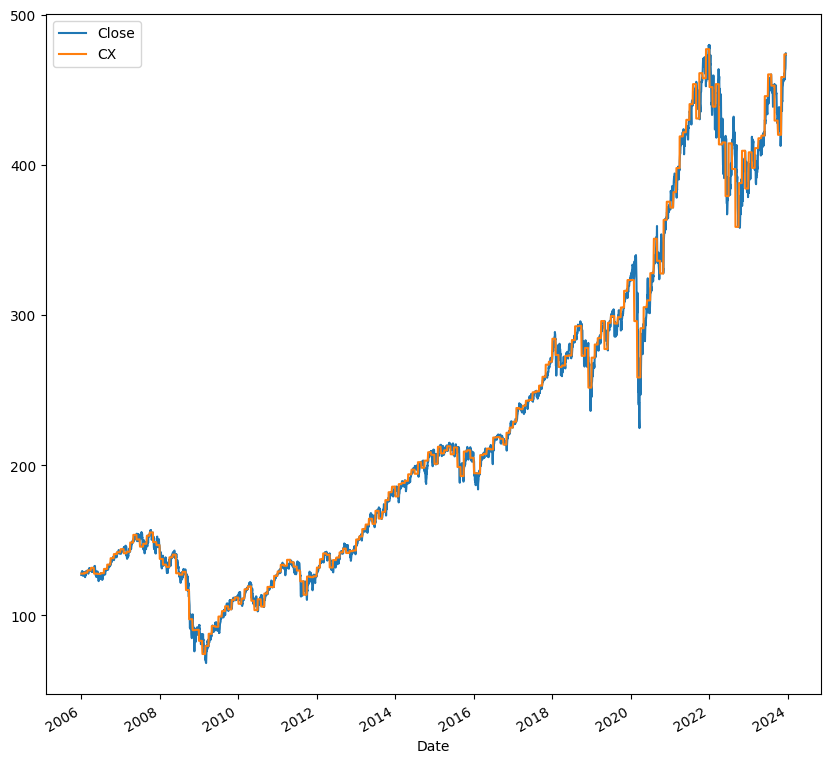

In [25]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 10))
data_agg_last_vis.set_index('Date')[['Close', 'CX']].plot(ax=ax)

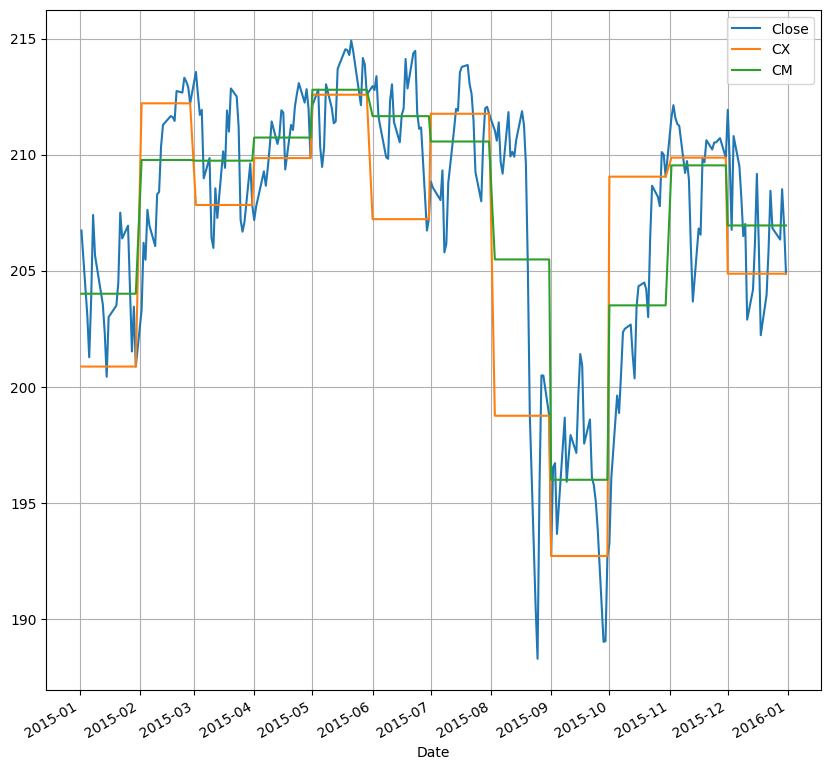

In [28]:
import matplotlib.dates as mdates
# xx = data_agg_last_vis.set_index('Date')[['Close', 'CX', 'CZ', 'CM', 'CN']]
xx = data_agg_last_vis.set_index('Date')[['Close', 'CX', 'CM']]
xx = xx[(xx.index >= '2015-01-01') * (xx.index <= '2015-12-31')]
fig, ax = pyplot.subplots(figsize=(10, 10))

xx.plot(ax=ax, grid='on')
ax.xaxis.set_major_locator(mdates.MonthLocator())